In [15]:
# Diabetes Analysis and Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import joblib

In [15]:
# Load Dataset
data_path = "C:\\Users\\HP\\Desktop\\Aqsa\\My Courses\\MeriSkill Internship\\Diabetes\\dataset.csv"  # Specify the correct file path
df = pd.read_csv(data_path)  # Use pd.read_csv() for CSV files
print("Dataset loaded successfully.")

# Display initial rows of the dataset
print("Initial dataset preview:")
print(df.head())

# Data Preprocessing
# Checking for null values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

Dataset loaded successfully.
Initial dataset preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age      

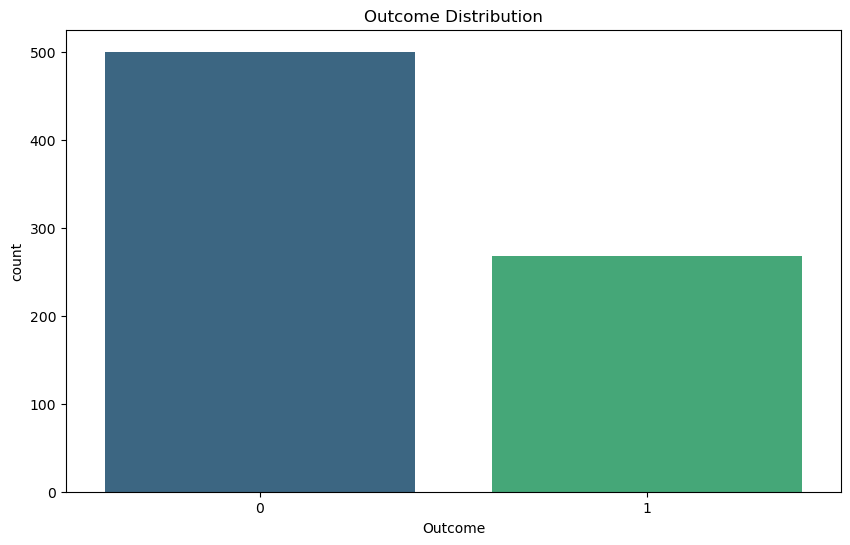

In [17]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df, hue='Outcome', palette='viridis', legend=False)
plt.title('Outcome Distribution')
plt.show()

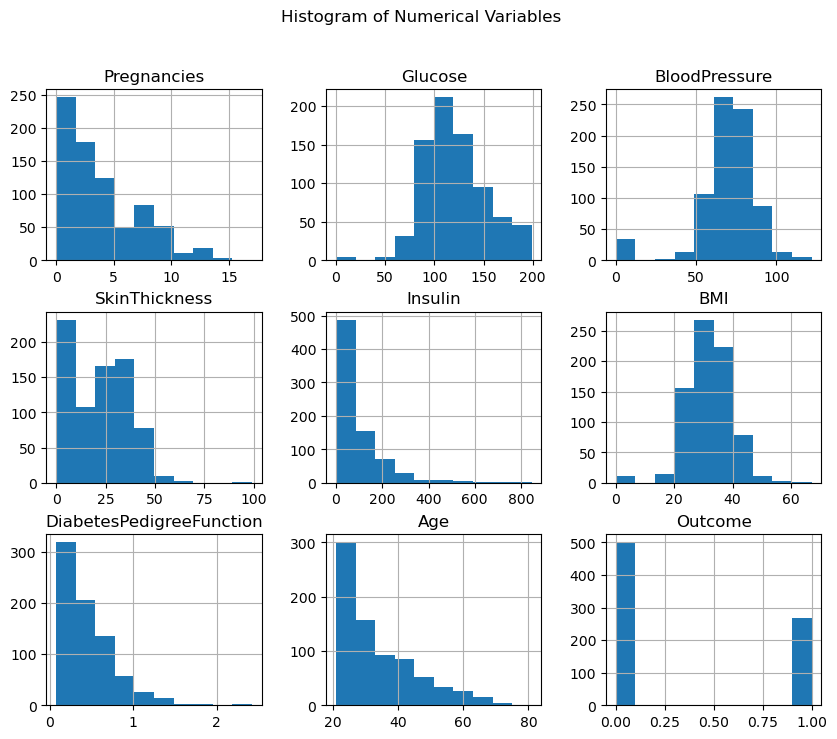

In [92]:
# Histogram for numerical variables
df.hist(figsize=(10, 8))
plt.suptitle("Histogram of Numerical Variables")
plt.show()

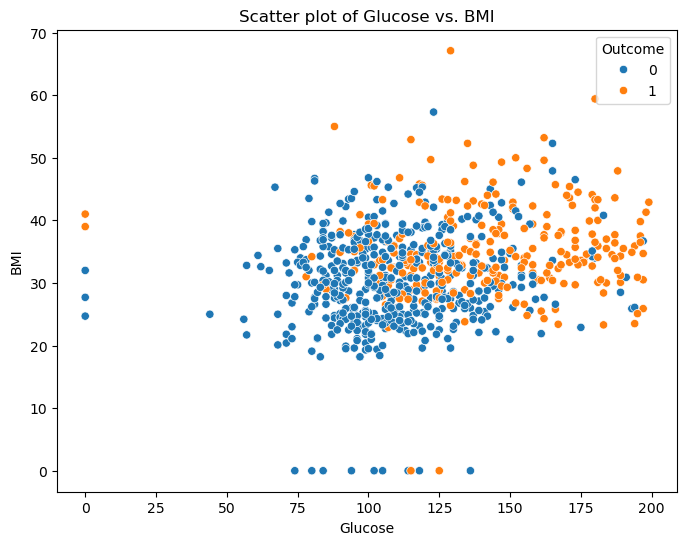

In [19]:
# Scatter plot for Glucose vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Scatter plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

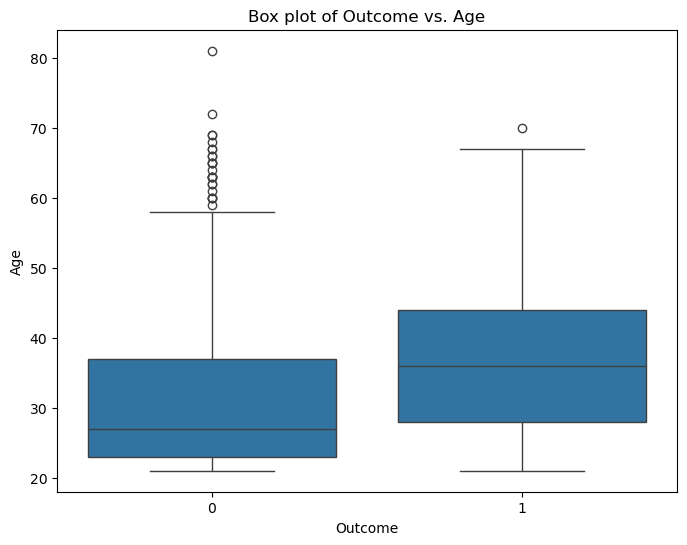

In [94]:
# Box plot for Outcome vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='Age')
plt.title('Box plot of Outcome vs. Age')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

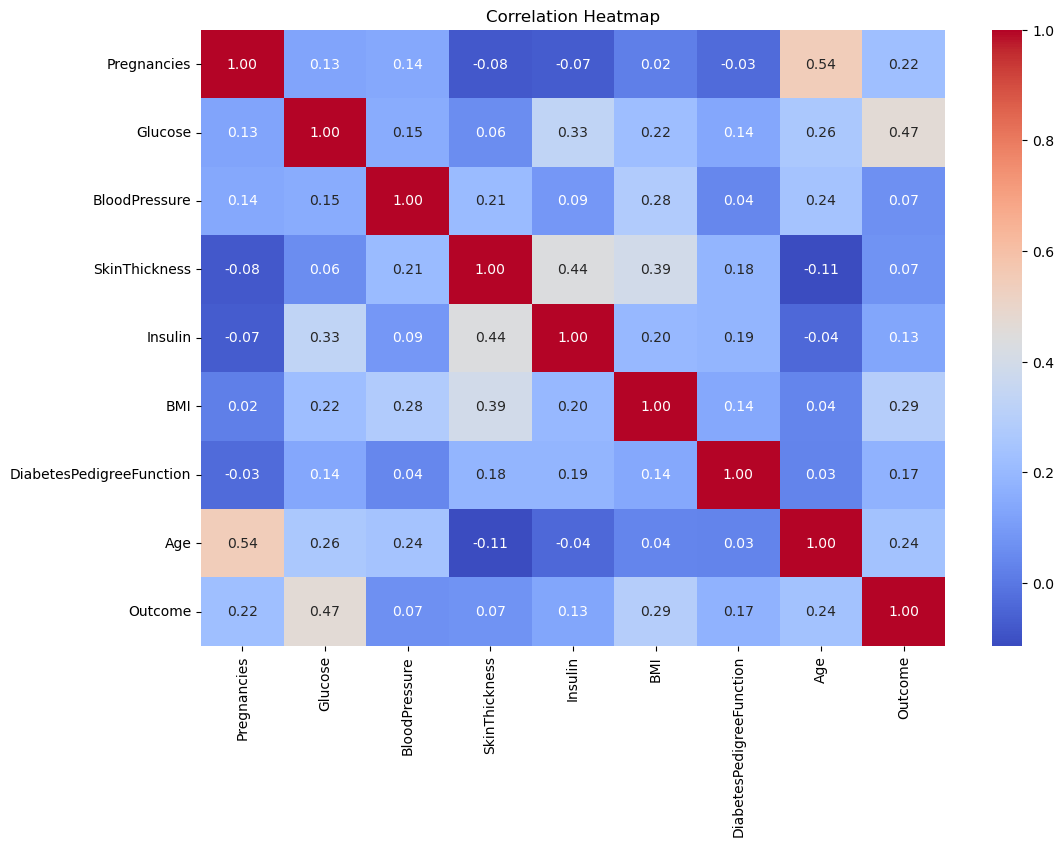

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Feature and Target Split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [25]:
# Model Evaluation
predictions = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[79 20]
 [18 37]]

Model Accuracy: 75.32%


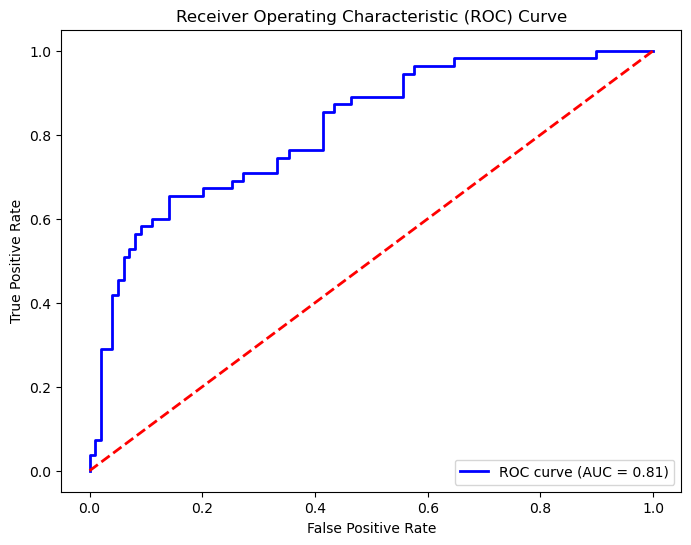

AUC Score: 0.8146923783287419


In [27]:
# Compute probabilities for class 1
probabilities = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
auc_score = roc_auc_score(y_test, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

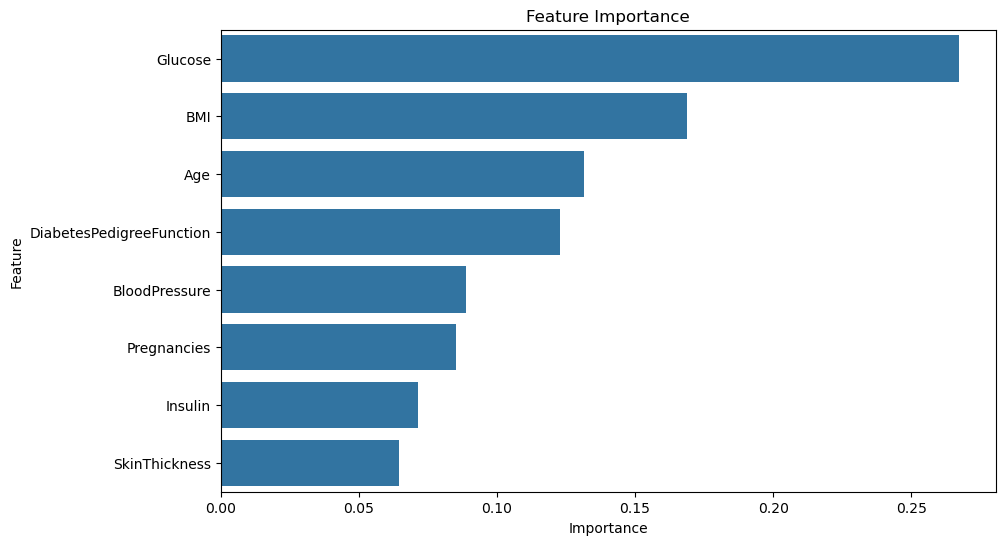

In [99]:
# Random Forest Classifier
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

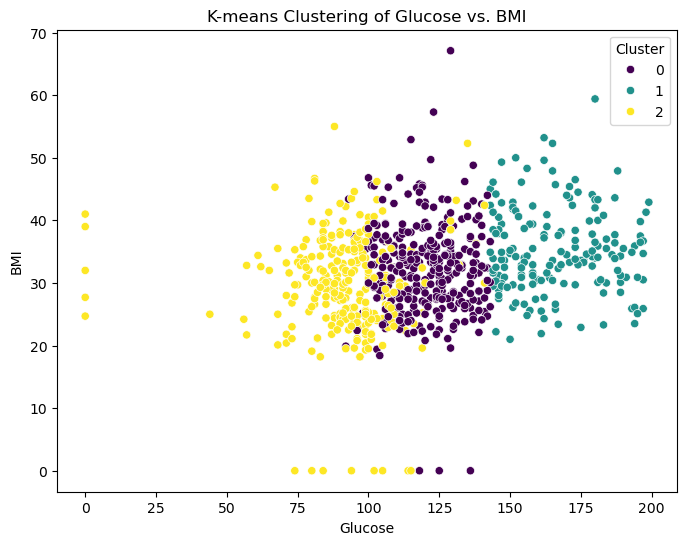

In [29]:
# K-means Clustering
# Selecting relevant features for clustering
X_cluster = df[['Glucose', 'BloodPressure', 'BMI']]

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [31]:
# Save Final Logistic Regression Model
model_filename = "diabetes_prediction_model.pkl"
joblib.dump(model, model_filename)
print(f"Logistic Regression Model saved to {model_filename}")

Logistic Regression Model saved to diabetes_prediction_model.pkl
